IN this notebook, we improve our baseline model by handling class imbalance and other analysis. In previous sections, we built few baseline models and Random Forest was the best performer. We shall imporve this model by handling class imbalance and hyperparameter tuning.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as stats

import pickle
from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve, validation_curve, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV
from mlxtend.plotting import plot_confusion_matrix


import warnings
warnings.filterwarnings('ignore')
plt.style.use('ggplot')

In [2]:
# loading d= data
data = pd.read_csv('data/WA_Fn-UseC_-Telco-Customer-Churn.csv')
print("shape: ", data.shape)
pd.set_option("display.max_columns",None)
data

shape:  (7043, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


The data set includes information about:  

<li>Customers who left within the last month – the column is called Churn</li>
<li>Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies</li>
<li>Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges</li>
<li>Demographic info about customers – gender, age range, and if they have partners and dependents</li>


**CustomerID**: A unique ID that identifies each customer.  
**Gender**: The customer’s gender: Male, Female  
**Age**: The customer’s current age, in years, at the time the fiscal quarter ended.  
**SeniorCitizen**: Indicates if the customer is 65 or older: Yes, No  
**Partner**: Indicates if the customer is married: Yes, No  
**Dependents**: Indicates if the customer lives with any dependents: Yes, No. Dependents could be children, parents, grandparents, etc.  
**Tenure**: Indicates the total amount of months that the customer has been with the company by the end of the quarter specified above.  
**PhoneService**: Indicates if the customer subscribes to home phone service with the company: Yes, No  
**MultipleLines**: Indicates if the customer subscribes to multiple telephone lines with the company: Yes, No, No phone service  
**InternetService**: Indicates if the customer subscribes to Internet service with the company: No, DSL, Fiber Optic, Cable.  
**OnlineSecurity**: Indicates if the customer subscribes to an additional online security service provided by the company: Yes, No, No internet service  
**OnlineBackup**: Indicates if the customer subscribes to an additional online backup service provided by the company: Yes, No, No internet service  
**DeviceProtection**: Indicates if the customer subscribes to an additional device protection plan for their Internet equipment provided by the company: Yes, No, No internet Service  
**TechSupport**: Indicates if the customer subscribes to an additional technical support plan from the company with reduced wait times: Yes, No, No internet service  
**StreamingTV**: Indicates if the customer uses their Internet service to stream television programing from a third party provider: Yes, No. The company does not charge an additional fee for this service.  
**StreamingMovies**: Indicates if the customer uses their Internet service to stream movies from a third party provider: Yes, No. The company does not charge an additional fee for this service.  
**Contract**: Indicates the customer’s current contract type: Month-to-Month, One Year, Two Year.  
**PaperlessBilling**: Indicates if the customer has chosen paperless billing: Yes, No
**PaymentMethod**: Indicates how the customer pays their bill: Bank Withdrawal, Credit Card, Mailed Chec**k  
MonthlyCharge**: Indicates the customer’s current total monthly charge for all their services from the company.  
**TotalCharges**: Indicates the customer’s total charges, calculated to the end of the quarter specified above.  

In [3]:
data.isna().sum()             # checking for null values

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

so no null values are present

In [4]:
data.info()           # information about dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
data.describe()          # viewing simple discriptive stratistics 

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [8]:
data['SeniorCitizen'] = pd.Categorical(data['SeniorCitizen'])

In [9]:
data[data['TotalCharges']==" "]     # ater some analysis, found that there was actually few empty input for this column

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [10]:
data['TotalCharges'] = data['TotalCharges'].replace(r'\s+', np.nan, regex=True)  # replace those empty inputs with nan values
data.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

we can wee 11 empty entry in TotalCharge Columns.As it is very low in number, we can either drop them or impute them with mean of TotalCharge column. i will go with the later one.

In [11]:
data['SeniorCitizen'] = pd.Categorical(data['SeniorCitizen']) # senior citizen was in numeric type but it is actually a categorical 
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')   # TotalCharges column was in object type. we converted it to numerics
mean = data['TotalCharges'].mean() 
median = data['TotalCharges'].median()

In [12]:
mean, median

(2283.3004408418656, 1397.475)

In [13]:
data['TotalCharges'] = data['TotalCharges'].fillna(mean)  # we will fill those nan values by mean

In [14]:
#data = data.replace(r'\s+', np.nan, regex=True)

In [15]:
total = data.isna().sum().sort_values(ascending=False)
percent = (data.isna().sum()/data.isna().count()).sort_values(ascending=False)
missing_values = pd.concat([total,percent], axis=1, keys=['Total','Percent'])
missing_values

,Total,Percent
customerID,0,0.0
DeviceProtection,0,0.0
TotalCharges,0,0.0
MonthlyCharges,0,0.0
PaymentMethod,0,0.0
PaperlessBilling,0,0.0
Contract,0,0.0
StreamingMovies,0,0.0
StreamingTV,0,0.0
TechSupport,0,0.0


In [16]:
data.describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2283.300441
std,24.559481,30.090047,2265.000258
min,0.000000,18.250000,18.800000
25%,9.000000,35.500000,402.225000
50%,29.000000,70.350000,1400.550000
75%,55.000000,89.850000,3786.600000
max,72.000000,118.750000,8684.800000


everything looks fine.

In [17]:
# column Churn is our target feature. It was in categorical form.we will encode them below with binary values.
encoder = LabelEncoder()
data['Churn'] = encoder.fit_transform(data['Churn'])

In [18]:
data.Churn.unique()

array([0, 1])

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customerID        7043 non-null   object  
 1   gender            7043 non-null   object  
 2   SeniorCitizen     7043 non-null   category
 3   Partner           7043 non-null   object  
 4   Dependents        7043 non-null   object  
 5   tenure            7043 non-null   int64   
 6   PhoneService      7043 non-null   object  
 7   MultipleLines     7043 non-null   object  
 8   InternetService   7043 non-null   object  
 9   OnlineSecurity    7043 non-null   object  
 10  OnlineBackup      7043 non-null   object  
 11  DeviceProtection  7043 non-null   object  
 12  TechSupport       7043 non-null   object  
 13  StreamingTV       7043 non-null   object  
 14  StreamingMovies   7043 non-null   object  
 15  Contract          7043 non-null   object  
 16  PaperlessBilling  7043 n

In [20]:
categ_features = [feature for feature in data.columns if data[feature].dtype == 'O']
print('Number of categorical features:', len(categ_features))
print(categ_features)

Number of categorical features: 16
['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']


In [21]:
num_features = [feature for feature in data.columns if data[feature].dtype != 'O']
print('Number of categorical features:', len(num_features))
print(num_features)

Number of categorical features: 5
['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']


In [22]:
categ_features.append('SeniorCitizen') 
categ_features.remove('customerID')
num_features.remove('SeniorCitizen')
num_features.remove('Churn')

In [23]:
num_features

['tenure', 'MonthlyCharges', 'TotalCharges']

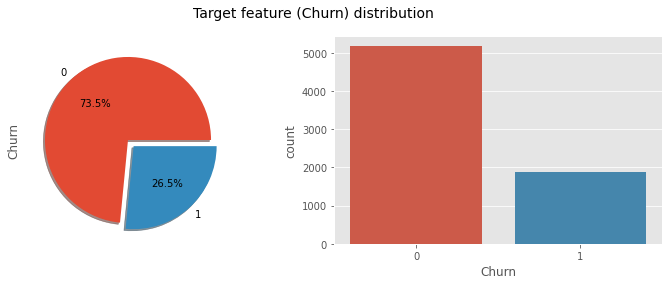

In [24]:
plt.figure(figsize=(10,4))
plt.suptitle("Target feature (Churn) distribution", fontsize=14)
plt.subplot(121)
data['Churn'].value_counts().plot.pie(explode=[0,0.1], shadow=True, autopct='%1.1f%%')
plt.subplot(122)
sns.countplot(data['Churn'])
plt.tight_layout()
plt.savefig('plots/classdistribution.png')

We see some class imbalacne. we will handle this imbalance later in this notebook. Such class imbalanc causes models to be biased towards majority class observations giving low priority to minority class observation. This is a very serious issue in building machine learning models.

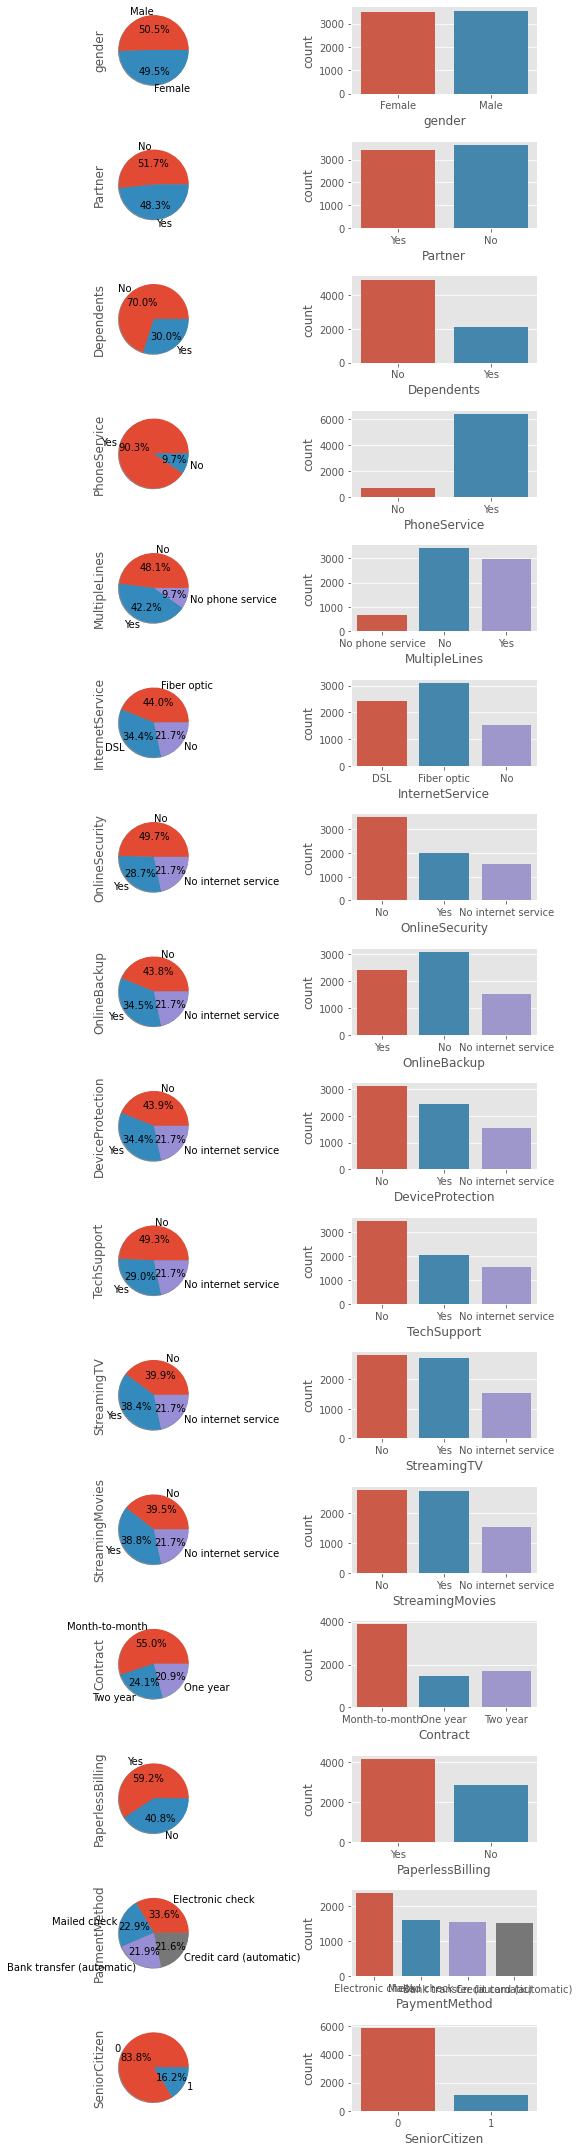

In [25]:
# lets look at ehe distribution of each categorical values
plt.figure(figsize=(8,30))
count=1
for feature in categ_features:
    plt.subplot(16,2,count)
    data[feature].value_counts().plot.pie(shadow=True, autopct='%1.1f%%')
    count += 1
    plt.subplot(16,2,count)
    sns.countplot(data[feature])
    count += 1
plt.tight_layout()
plt.savefig("plots/freqdist_categ.png")
plt.show()

The plots above are sef-explanatory. They shows the distribution of each categorical variables.

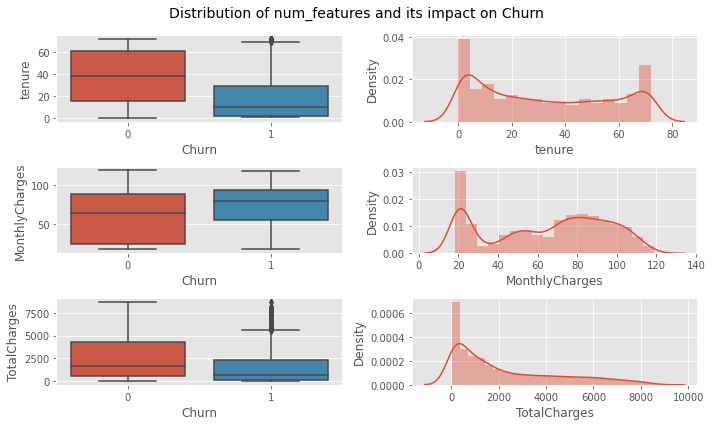

In [26]:
# lets see the distribution of each numerical features and aslo wuth respect to class variable(Churn)
plt.figure(figsize=(10,6))
count=1
plt.suptitle("Distribution of num_features and its impact on Churn", fontsize=14)
for feature in num_features:
    plt.subplot(3,2,count)
    sns.boxplot(data['Churn'], data[feature])
    count += 1
    plt.subplot(3,2,count)
    sns.distplot(data[feature])
    count += 1
plt.tight_layout()
plt.savefig('plots/num_distri_plus_with_Churn.png')
plt.show()

<ul>
    <li>Tenure: Customerswho have been with the company for less months by the quarter have high churn rate.</li>
    <li>MOnthlyCharge: Customers with high monthly charge in average have high churn rate.</li>
    <li>TotalCharge: Customers who have low total charge in average have low churn rate. May be they are satisfied with the services irrespective to charges.</li>

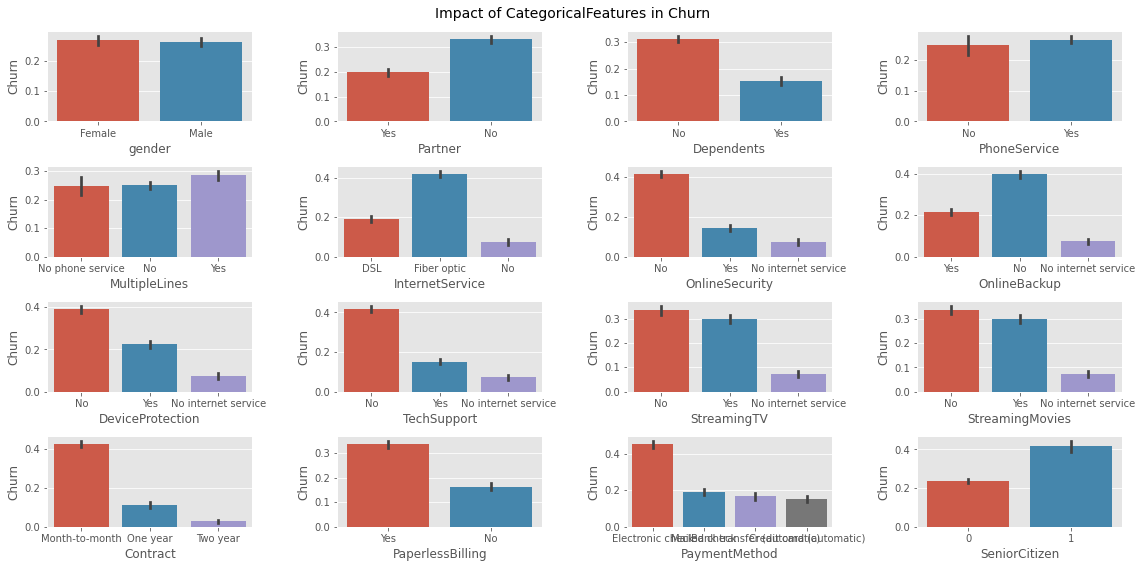

In [27]:
plt.figure(figsize=(16,8))
count = 1
plt.suptitle('Impact of CategoricalFeatures in Churn', fontsize=14)
for feature in categ_features:
    plt.subplot(4, 4, count)
    sns.barplot(data[feature],data['Churn'])
    count += 1
plt.tight_layout()
plt.savefig('plots/impact_of_cat_feat_in_Churn.png')
plt.show()
    

<ul>
    <li>gender: gender of customers have no significant affect on Churn event.</li>
    <li>Partner: customers without partners seems have high churn.</li>
    <li>Dependents: customers without dependents seems to have high Churn events.</li>
    <li>PhoneService: wheather customers signed up for home phone services or not doesnot seems to affect Churn event that much though those who have subscribed have slighlty high Churn in average.</li>
    <li>MultipleLines: customers who have singed up for services from multiple lines in average have slightly higher churn event than those who did not.</li>
    <li>InternetService: In average, about 44% of customers who have subscribed for internet for Fiber Optics have churn events. Similiarly, in average, about 18% customers who have used DSL for internet service have churn event. And about 7-8 % of customers who have not signed up for internet service have churn event. So, in average, customers who have subscribed internet with Fiber Optics have high churn rate</li>
    <li>OnlineSecurity: In average, customers who have not signed up for additional online security services have high churn rate.</li>
    <li>OnlineBackup: Customers eho have not subscribed for online backup have high churn (~40% in average). And around 22% Customers who have not subscribed of online backup have churn event in average. Around 8% custoemrs in average with no internet service have churn event.</li>
    <li>DeviceProtection: In average, customers who have not subscribed for additional device protection plan for their internet equipments with the company have high churn rate.<li>
    <li>TechSupport: Customers who have not signed up for tech support have higher churn event (~43%) than the customers who have  signed up (~15%).</li>
    <li>StreamingTV: Customers who uses internet for streaming TV showss have slightly higher Churn event (~35% in average) than those who have (~30% in average).</li>
    <li>StreamingMovies: About 35% of Customers in average who have not signed up for movies streaming service have churn event while about 30% of customers in average who have singed up for this service have churn rate. Around 17 % of customers in average who haved churned had no internet service for streaming</li>
    <li>Contract: Around 45% of customers who have contract term of less than one year (i.e. month-to-month) have churn event in average in contrast to around 12% of customers with one year contract and around 4% of customers with 2 years contract term. So it means lower the contract periods/term higher the chances of churn.</li>
    <li>PaperlessBilling: Around 35% of customers in average who had paperless billing service have churn event in contrast to  around 16% of customers kn average without paperless biling.</li>
    <li>PaymentMethod: Customers with payment method of electronic check have high churn event in average. While ohter methods don't have significant difference in churn event.</li>
    <li>SeniorCitizen: Customers who are senior citizens have higher chum rate in average than those who aren't.</li>
</ul>

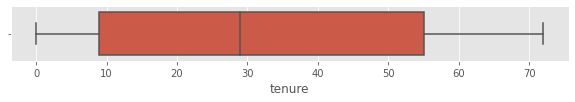

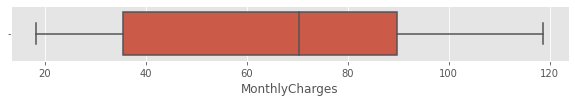

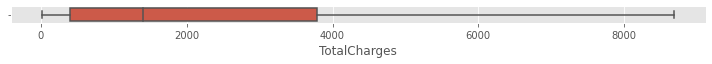

In [28]:
for feature in num_features:
    plt.figure(figsize=(10,1))
    sns.boxplot(data[feature])
plt.tight_layout()
plt.savefig('plots/num_features_boxplot.png')

We see some skewness in distribution.

In [29]:
data = data.drop('customerID', axis=1)   # customerID column have no importance for our analysis. Lets delete it.

In [30]:
df = data.copy()

In [31]:
# now we shall onehot encode all the categorical features 
data = pd.get_dummies(data, drop_first=True)    # drop_first=True is sone to avoide dummy variable trap
data.head()

,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,29.85,29.85,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0
1,34,56.95,1889.50,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
2,2,53.85,108.15,1,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
3,45,42.30,1840.75,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0
4,2,70.70,151.65,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0


In [32]:
data.shape

(7043, 31)

In [33]:
data_new = data.copy()

### overampling method to handle class imbalance  
We shao now handle class imbalance seen above. Over-sampling is the process of randomly duplicating observations from the minority class making it proportiate to majority class.  
**Approach**: we will first separate data into majority class and minority class and than we will oversample the minority class observation with replacement. and then we will combine majority class observation and oversampled minority class observation. Thats it.

In [34]:
data['Churn'].value_counts()     # class distribution before oversampling

0    5174
1    1869
Name: Churn, dtype: int64

In [35]:
from sklearn.utils import resample

# separate the maority and minority class observation
data_major = data[data['Churn'] == 0]
data_minor = data[data['Churn'] == 1]

# over-sample the minority class observations
data_minor_oversample = resample(data_minor, replace = True, n_samples=data_major.shape[0], random_state = 0)

# finally combine the majority class observation and oversampled minoiry class observation
data = pd.concat([data_major, data_minor_oversample])

In [36]:
data.Churn.value_counts()  # class distribution after oversampling

0    5174
1    5174
Name: Churn, dtype: int64

In [37]:
# separateing dependent(Churn) and independent features
X = data[data.loc[:,data.columns != 'Churn'].columns]
Y = data['Churn']

# now lets split data into train and test vectors
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

In [38]:
x_train.head()

,tenure,MonthlyCharges,TotalCharges,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
3448,4,61.45,229.55,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0
3360,13,83.20,1060.60,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0
3862,70,25.40,1782.05,1,0,1,1,1,0,1,0,1,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,0,0,1
5996,62,19.85,1253.65,1,0,0,0,1,0,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,0,0,0
344,41,20.25,865.00,0,0,0,1,1,0,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,1,0,0


In [39]:
y_train

3448    1
3360    1
3862    0
5996    0
344     0
       ..
3933    0
6971    1
1226    0
1211    1
315     0
Name: Churn, Length: 8278, dtype: int32

### Model Building
Tere are a lot of categorical features. So a tree based classifiers like Random Forest, Decision Tree performs better. In our case, RandomForest was the best performer.

In [40]:
logreg = LogisticRegression()
svm = SVC()
rf = RandomForestClassifier()
nb = GaussianNB()
knn = KNeighborsClassifier()
d_tree = DecisionTreeClassifier()

accuracies = {}
CV_scores = {}
def Execute(model):
    model = model
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print("Model score: ", model.score(x_train,y_train))
    print('Test Score: ', accuracy_score(y_test,y_pred))
    scores = cross_val_score(model, x_train, y_train, cv=10)
    print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))
    print('\nAUC score: ', metrics.roc_auc_score(y_test,y_pred))
    accuracies[model] = accuracy_score(y_test,y_pred)
    CV_scores[model] = scores
    print('\nClassification report:\n', classification_report(y_test,y_pred))
    # CREATING THE CONFUSION MATRIX
    fig, ax = plot_confusion_matrix(conf_mat = confusion_matrix(y_test,y_pred),
                                colorbar = True,
                                show_absolute = False,
                                show_normed = True,
                                figsize = (3,3))
    plt.title("confusion matrix", fontsize=14)
    plt.show()
    return model

Model score:  0.7708383667552549
Test Score:  0.7657004830917874
CV accuracy: 0.766 +/- 0.011

AUC score:  0.766004001759056

Classification report:
               precision    recall  f1-score   support

           0       0.78      0.74      0.76      1049
           1       0.75      0.79      0.77      1021

    accuracy                           0.77      2070
   macro avg       0.77      0.77      0.77      2070
weighted avg       0.77      0.77      0.77      2070



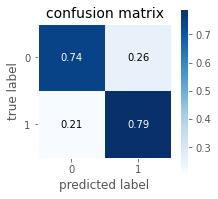

In [41]:
log_reg = Execute(logreg)     # train logistic regression model
with open('saved_models/log_reg.pkl', 'wb') as file:
    pickle.dump(log_reg,file)

Model score:  0.9981879681082387
Test Score:  0.8942028985507247
CV accuracy: 0.892 +/- 0.010

AUC score:  0.894856721900154

Classification report:
               precision    recall  f1-score   support

           0       0.94      0.85      0.89      1049
           1       0.86      0.94      0.90      1021

    accuracy                           0.89      2070
   macro avg       0.90      0.89      0.89      2070
weighted avg       0.90      0.89      0.89      2070



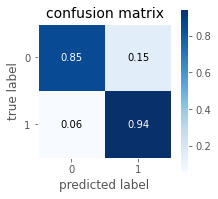

In [42]:
rf_clf = Execute(rf)             # train Random Forest Classifier
with open('saved_models/randomforest2.pkl', 'wb') as file:
    pickle.dump(rf_clf,file)

Pretty decent result obtained

Model score:  0.7289200289925103
Test Score:  0.7347826086956522
CV accuracy: 0.727 +/- 0.014

AUC score:  0.7370150574821037

Classification report:
               precision    recall  f1-score   support

           0       0.86      0.57      0.69      1049
           1       0.67      0.90      0.77      1021

    accuracy                           0.73      2070
   macro avg       0.76      0.74      0.73      2070
weighted avg       0.77      0.73      0.73      2070



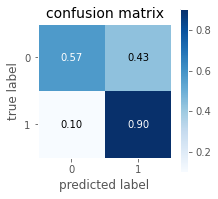

In [43]:
nb_clf = Execute(nb)
with open('saved_models/naivebayes.pkl', 'wb') as file:
    pickle.dump(nb_clf,file)

Model score:  0.9981879681082387
Test Score:  0.8734299516908213
CV accuracy: 0.857 +/- 0.014

AUC score:  0.8742564393681217

Classification report:
               precision    recall  f1-score   support

           0       0.93      0.81      0.87      1049
           1       0.83      0.94      0.88      1021

    accuracy                           0.87      2070
   macro avg       0.88      0.87      0.87      2070
weighted avg       0.88      0.87      0.87      2070



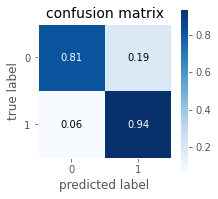

In [44]:
decisiontree = Execute(d_tree)
with open('saved_models/d_tree.pkl', 'wb') as file:
    pickle.dump(decisiontree,file)

We found that Random Forest is best performer among all the models followed by Decision Tree (low performing models have been deleted). It was exppected because we have almost all features in categorical form. And we know that tree based models are best when there are excessive categorical features.  

Now let's see what are the most important features for predictive modeling based on randomforest(becuase this is our best model).

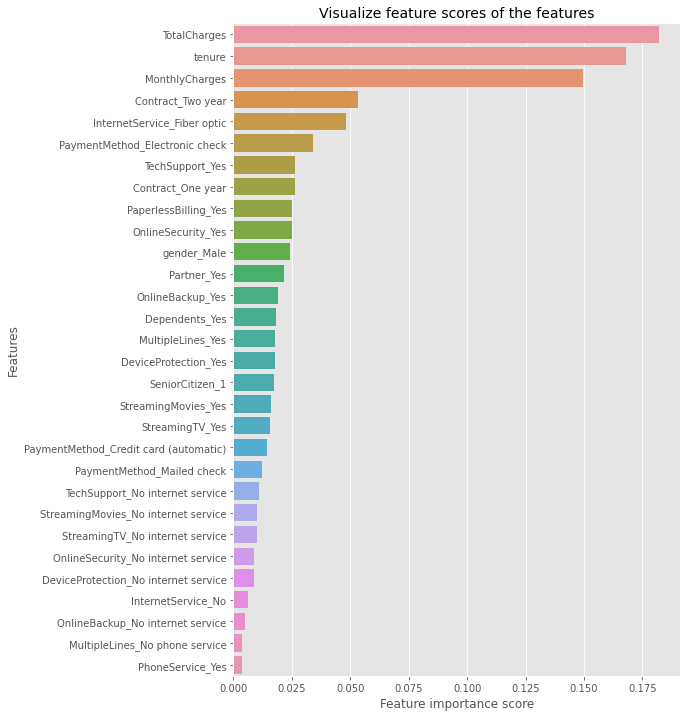

In [61]:
# view the feature scores/ feature importance 
feature_scores = pd.Series(rf_clf.feature_importances_, index=x_train.columns).sort_values(ascending=False)
plt.figure(figsize=(8,12))
sns.barplot(x=feature_scores, y=feature_scores.index, data=df)
plt.title("Visualize feature scores of the features", fontsize=14)
plt.yticks(fontsize=10)
plt.xlabel("Feature importance score", fontsize=12)
plt.ylabel("Features", fontsize=12)
plt.savefig('plots/feature_importance.png')
plt.show()

As we can see from the feature importance plots above, the most important features are:  
- Customer's TotalCharges 
- Customer's monthlyCharges
- Customer's tenure(number of months customer has been with the company) with the comapny
- Customer's contract with the company
- Internet Sevices customers have subscribed
- Tech support service customers have subscribed


So the outcome of the modeling are:
- cutomer with  Total Charges are most likely to churn compare to those with higher Total Charges
- customer with higher monthly charges are more likely to Churn
- customers who have been using services for more months (tenure) are less likely to churn


Let us try to make some more specific recommendations.
1. Find out the total charges, which should be focused on to lessen Churn event.







In [47]:
df_new = data_new.copy()

#introduce new column 'balance_buckets' to  ''
df_new['TotalCharges_buckets'] = pd.qcut(df_new['TotalCharges'], 50, labels=False, duplicates = 'drop')
mean_churn = df_new.groupby(['TotalCharges_buckets'])['Churn'].mean()
#print(df_new.shape)
mean_churn

TotalCharges_buckets
0     0.356643
1     0.431655
2     0.475524
3     0.671429
4     0.685714
5     0.539007
6     0.342857
7     0.432624
8     0.354610
9     0.312057
10    0.347518
11    0.347518
12    0.264286
13    0.281690
14    0.278571
15    0.234043
16    0.283688
17    0.255319
18    0.314286
19    0.283688
20    0.170213
21    0.297872
22    0.297872
23    0.170213
24    0.163121
25    0.221429
26    0.248227
27    0.141844
28    0.177305
29    0.177305
30    0.290780
31    0.285714
32    0.304965
33    0.262411
34    0.260563
35    0.214286
36    0.197183
37    0.129496
38    0.177305
39    0.177305
40    0.163121
41    0.141844
42    0.184397
43    0.171429
44    0.127660
45    0.141844
46    0.134752
47    0.141844
48    0.141844
49    0.063830
Name: Churn, dtype: float64

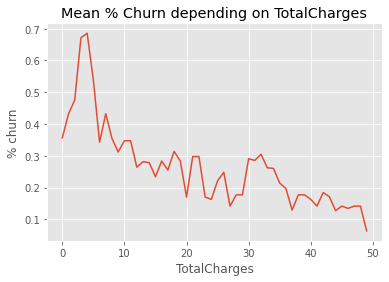

In [48]:
plt.plot(mean_churn.index, mean_churn.values)
plt.title('Mean % Churn depending on TotalCharges')
plt.xlabel('TotalCharges')
plt.ylabel('% churn')
plt.show()

In [53]:
df_new[df_new['TotalCharges_buckets'] == 7]['TotalCharges'].max()

184.4

Fromt figure we can see that customers tends to churn more when the total charges is low. This is indeed a surprising as we would expect to churn when the total charges arehigher. this could be because the those who are paying hihger total charges have opted for more services and yearly subscription plans and those who are paying low total charges moght have subscribed for very few services and could not get expected results from those services.(Expert opinions needed.)  

Anyway, customers with totalcharges less than $184 (or any currency) have high churn. And those who are paying more than this amount tends churn less. 


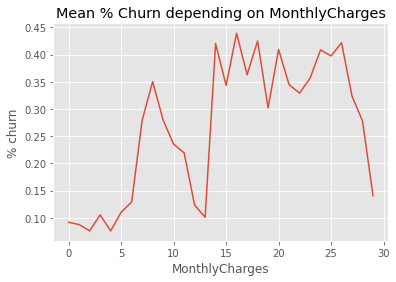

In [54]:
 ''
df_new['MonthlyCharges_buckets'] = pd.qcut(df_new['MonthlyCharges'], 30, labels=False, duplicates = 'drop')
mean_churn = df_new.groupby(['MonthlyCharges_buckets'])['Churn'].mean()
plt.plot(mean_churn.index, mean_churn.values)
plt.title('Mean % Churn depending on MonthlyCharges')
plt.xlabel('MonthlyCharges')
plt.ylabel('% churn')
plt.show()

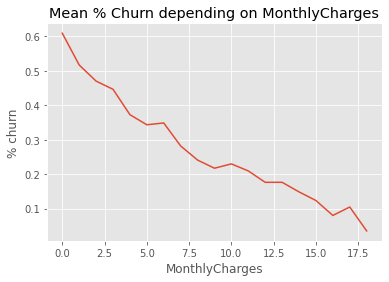

In [55]:
#introduce new column 'balance_buckets' to  ''
df_new['tenure_buckets'] = pd.qcut(df_new['tenure'], 20, labels=False, duplicates = 'drop')
mean_churn = df_new.groupby(['tenure_buckets'])['Churn'].mean()
plt.plot(mean_churn.index, mean_churn.values)
plt.title('Mean % Churn depending on MonthlyCharges')
plt.xlabel('MonthlyCharges')
plt.ylabel('% churn')
plt.show()

In [60]:
df_new[df_new['tenure_buckets'] == 3]['tenure'].min()

4

From the above figure we can see that the average Churn is below 50% if the customer have been with the company for more than 4 months

In [57]:
#Randomized Search CV

n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]   # Number of trees in random forest
max_features = ['auto', 'sqrt']                                            # Number of features to consider at every split
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]                   # Maximum number of levels in tree
# max_depth.append(None)
min_samples_split = [2, 5, 10, 15, 100]                             # Minimum number of samples required to split a node
min_samples_leaf = [1, 2, 5, 10, 15]                            # Minimum number of samples required at each leaf node

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10, 15]}


In [60]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error',
                               n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=700; total time=   6.9s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=700; total time=   7.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=700; total time=   7.2s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=700; total time=   8.7s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=700; total time=   7.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=400; total time=   5.4s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=400; total time=   4.4s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, 

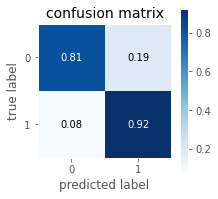

In [61]:
Execute(rf_random)

In [62]:
accuracies

{LogisticRegression(): 0.7657004830917874,
 RandomForestClassifier(): 0.8971014492753623,
 GaussianNB(): 0.7347826086956522,
 KNeighborsClassifier(): 0.7521739130434782,
 DecisionTreeClassifier(): 0.8729468599033816,
 RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=1,
                    param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                         'max_features': ['auto', 'sqrt'],
                                         'min_samples_leaf': [1, 2, 5, 10, 15],
                                         'min_samples_split': [2, 5, 10, 15,
                                                               100],
                                         'n_estimators': [100, 200, 300, 400,
                                                          500, 600, 700, 800,
                                                          900, 1000, 1100,
                                                          1200]},
                    random_state=4

In [63]:
CV_scores

{LogisticRegression(): array([0.75845411, 0.77173913, 0.76328502, 0.78381643, 0.75724638,
        0.76811594, 0.75845411, 0.75241546, 0.75937122, 0.78476421]),
 RandomForestClassifier(): array([0.88405797, 0.88768116, 0.90821256, 0.90821256, 0.87681159,
        0.89492754, 0.87801932, 0.89130435, 0.89117291, 0.89359129]),
 GaussianNB(): array([0.71376812, 0.75241546, 0.73671498, 0.73913043, 0.70531401,
        0.7173913 , 0.71256039, 0.72826087, 0.73155985, 0.73639661]),
 KNeighborsClassifier(): array([0.76690821, 0.74637681, 0.74033816, 0.77173913, 0.74396135,
        0.74154589, 0.76690821, 0.71497585, 0.75937122, 0.76904474]),
 DecisionTreeClassifier(): array([0.84661836, 0.852657  , 0.87318841, 0.88164251, 0.85628019,
        0.86111111, 0.85507246, 0.85386473, 0.85006046, 0.84038694]),
 RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=1,
                    param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                         'max_f